### Интерполяция
##### Задача:
Написать функцию, которая строит интерполяционный многочлен $P_{\alpha}(x)$ на $[-k, k]$ для функции $$f(x) = 1 / (1 + x^2)$$ на равномерной сетке и на сетке из узлов (корней многочленов) Чебышева ([wiki](https://en.wikipedia.org/wiki/Chebyshev_nodes)). Сравнить результаты.

Код ниже основан на решении дз 3, но чуть отличается.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def my_interpolation(xgrid: np.ndarray, ygrid: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Build Lagrange polynomial based on (xgrid, ygrid) and calculate its values in points x."""
    k = len(xgrid)
    res = []
    for v in x:
        s = 0.
        for i in range(k):
            p = 1.
            for j in range(k):
                if j == i:
                    continue
                p *= (v - xgrid[j]) / (xgrid[i] - xgrid[j]) * ygrid[i]
            s += p
        res.append(s)
    return np.array(res, dtype=np.float64)

def lin_interpolation(x: np.ndarray, k: int = 5) -> np.ndarray:
    """Calculate images of points x using Lagrange polynomial with evenly spaced grid"""
    xgrid = np.linspace(-k, k, 2 * k + 1, dtype=np.float64)
    ygrid = 1. / (1 + xgrid ** 2)
    return my_interpolation(xgrid, ygrid, x)

def cheb_interpolation(x: np.ndarray, k: int = 5) -> np.ndarray:
    """Calculate images of points x using Lagrange polynomial with chebyshev nodes grid"""
    xgrid = np.polynomial.chebyshev.chebroots([0] * (2 * k + 1) + [1]) * k
    ygrid = 1. / (1 + xgrid ** 2)
    return my_interpolation(xgrid, ygrid, x)


C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_9368\3533513555.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


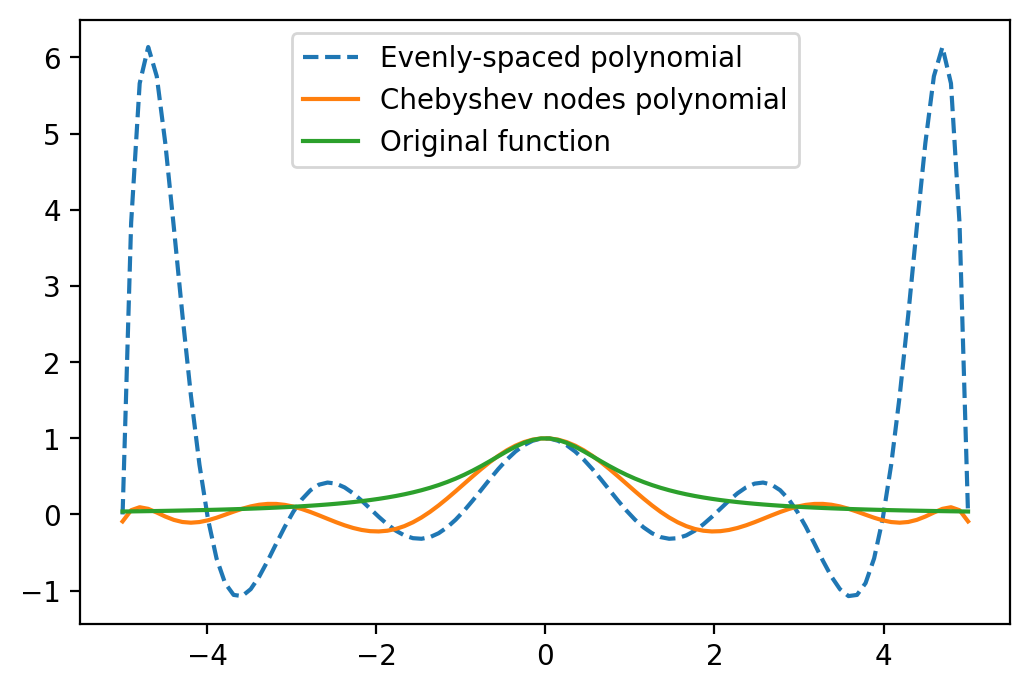

In [23]:
K = 5
x = np.linspace(-K,K, 100)
y_lin = lin_interpolation(x, K)
y_cheb = cheb_interpolation(x, K)

fig, ax = plt.subplots(dpi=200)
ax.plot(x, y_lin, "--", label="Evenly-spaced polynomial")
ax.plot(x, y_cheb, label="Chebyshev nodes polynomial")
ax.plot(x, 1. / (1 + x ** 2), label="Original function")
ax.legend()
fig.show()


Видно, что если выбирать точки, по которым строится многочлен Лагранжа, не равномерно на отрезке, а в узлах Чеыбшева, то результат чуть лучше.